In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.externals import joblib
from sklearn.datasets import fetch_mldata
from skimage.feature import hog
from sklearn.svm import LinearSVC

import cv2

In [16]:
# Load and cache MNIST dataset

mnist = fetch_mldata('MNIST original')

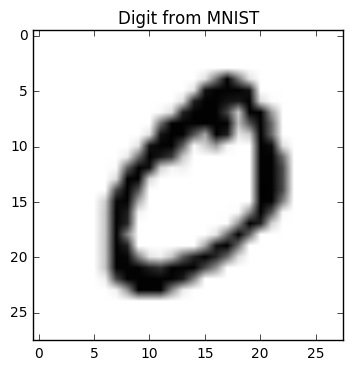

In [34]:

# Images
features = np.array(mnist.data, 'int16')

single_digit = features[0]
plt.title('Digit from MNIST')
plt.imshow(single_digit.reshape(28, 28), cmap='Greys')

# Corresponding digit
labels = np.array(mnist.target, 'int')

# Calculate HOG features for every image in the dataset
hog_features = []


for feature in features:
    fd = hog(feature.reshape(28, 28), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    hog_features.append(fd)
hog_features = np.array(hog_features, 'float64')

In [37]:
clf = LinearSVC()
clf.fit(hog_features, labels)

# We save classifier to later avoid the need for re-computation
joblib.dump(clf, "digits_classificated.pkl", compress=True)

['digits_classificated.pkl']